In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('data/features.csv')
print(df.shape)
df.head(10)

(3019, 24)


address  is_ponzi     lifetime  active_days  \
0  15fcEUmKXBiScw2CDwKEre2YE8brvWPxVA         0    2051098.0         15.0   
1  121E9w1ogmjowDbJmkmCuqqQGztJteR78A         0   76904190.0         87.0   
2  12Hd6yd28NXoLuBYwqfncv3J7xXQnKKhGb         0  178821948.0        119.0   
3  166uYUb7ogk1xyxSSYQzdXRefdbYJaMTjs         0     934241.0         10.0   
4  16Zf5yBa2BhitYZMdENxAfkPs244YTG7y4         0     706251.0          8.0   
5  17wLBifUVkmAovSbVGJcXTvsgUiSMa1rjx         0   60485898.0         23.0   
6  1EyzXkzD4bRRJFwWs48rhtwe6WsE8bxARJ         0   69263044.0         29.0   
7  14XDyg1YkQFEkjJEHGYS1x3MSGEnhhATtH         0    3669366.0         22.0   
8  19QgdEbau15zQVNoTuMHtRRz4nsYv7mgSy         0    4484595.0         22.0   
9  1PkiFqu4w85DDvZ1bTgyPKijw99bpHz3dD         0   72574712.0         37.0   

   max_daily_trans  gini_in_btc  mean_in_btc  std_in_btc  gini_out_btc  \
0              5.0     0.357698     0.225758    0.210325      0.000000   
1              4.0     0.475421     1.747873    1.668753      0.624611   
2              8.0     0.804569     0.163084    0.374698      0.596838   
3              8.0     0.136573     3.424839    0.912797      0.312918   
4             13.0     0.762761    20.478750   47.629678      0.759380   
5              2.0     0.225359     0.801154    0.360132      0.361794   
6              2.0     0.301632     2.560537    2.084371      0.689659   
7              9.0     0.497593     0.065952    0.064736      0.091093   
8              3.0     0.683410     0.179130    0.263965      0.158809   
9              2.0     0.367438     0.020882    0.015599      0.585507   

   mean_out_btc  ...  num_outgoing  in_out_ratio  uniq_in_addresses  \
0      0.100000  ...           1.0     33.000000               33.0   
1      5.056347  ...          29.0      2.793103               81.0   
2      2.010743  ...           5.0     39.600000              198.0   
3     26.542500  ...           4.0      7.750000               31.0   
4     30.070000  ...          14.0      1.285714               18.0   
5      5.087500  ...           4.0      6.500000               24.0   
6      8.778984  ...           7.0      3.428571               24.0   
7      1.235000  ...           2.0     21.000000               42.0   
8      1.343333  ...           3.0      7.666667               23.0   
9      0.138000  ...           5.0      6.800000               34.0   

   uniq_out_addresses  uniq_addresses  min_delay   max_delay    mean_delay  \
0                 1.0            34.0      165.0       165.0  1.650000e+02   
1                29.0           110.0     2981.0   1050958.0  1.191218e+05   
2                 5.0           203.0     8595.0  91109142.0  4.555887e+07   
3                 4.0            35.0     2563.0    122534.0  3.886600e+04   
4                12.0            30.0      647.0    259088.0  4.167078e+04   
5                 4.0            28.0    16737.0  54112482.0  1.805647e+07   
6                 7.0            31.0    17703.0   7125809.0  1.544287e+06   
7                 2.0            44.0     8007.0     52904.0  3.045550e+04   
8                 3.0            26.0     1999.0      7479.0  4.172667e+03   
9                 5.0            39.0   520821.0  54823427.0  2.767212e+07   

   median_delay  max_balance_diff  
0         165.0          1.370000  
1       29392.0         66.280000  
2    45558868.5          6.011769  
3       15183.5         82.920000  
4        3176.0        230.520000  
5       40186.0          6.000000  
6      209894.0          2.217261  
7       30455.5          1.460000  
8        3040.0          1.970000  
9    27672124.0          0.680000  

[10 rows x 24 columns]

In [4]:
# we can see that the range of values from 25%, 50% to max is increasing rapidly
# this shows that some of the feature values are skewed

# Most of ml models require data to be normally distributed to work well.
df.describe()

is_ponzi      lifetime  active_days  max_daily_trans   gini_in_btc  \
count  3019.000000  3.019000e+03  3019.000000      3019.000000  3.019000e+03   
mean      0.010268  5.659720e+07    57.300431        23.581650  4.166675e-01   
std       0.100828  6.665041e+07    82.041053       200.783687  2.294899e-01   
min       0.000000  2.000000e+00     1.000000         1.000000 -2.775530e-17   
25%       0.000000  6.221100e+06    22.000000         3.000000  2.475102e-01   
50%       0.000000  2.773387e+07    33.000000         5.000000  3.995466e-01   
75%       0.000000  7.972541e+07    58.000000         9.000000  5.704064e-01   
max       1.000000  3.356006e+08  1270.000000      4839.000000  9.948892e-01   

       mean_in_btc   std_in_btc  gini_out_btc  mean_out_btc  std_out_btc  ...  \
count  3019.000000  3019.000000   3019.000000   3019.000000  3019.000000  ...   
mean     11.027503    15.837775      0.480603     30.357623    38.219442  ...   
std      90.043843   135.127207      0.210409    202.723719   285.596687  ...   
min       0.000216     0.000000      0.000000      0.000000     0.000000  ...   
25%       0.256005     0.191440      0.358526      1.046146     0.788889  ...   
50%       0.990667     0.668329      0.486419      3.470000     3.163826  ...   
75%       2.513364     2.556467      0.624666     10.329150    11.066133  ...   
max    2236.363636  4092.148065      0.999666   4992.905000  8150.570078  ...   

       num_outgoing  in_out_ratio  uniq_in_addresses  uniq_out_addresses  \
count   3019.000000  3.019000e+03        3019.000000         3019.000000   
mean      45.695263  2.128188e+10          85.320305           32.344816   
std      326.284842  3.738077e+11         255.959607          212.344976   
min        0.000000  1.995211e-04           1.000000            0.000000   
25%        7.000000  1.533333e+00          23.000000            6.000000   
50%       13.000000  3.537815e+00          36.000000           12.000000   
75%       24.000000  8.569444e+00          72.000000           23.000000   
max     9945.000000  1.730000e+13        8106.000000         8725.000000   

       uniq_addresses     min_delay     max_delay    mean_delay  median_delay  \
count     3019.000000  3.019000e+03  3.019000e+03  3.019000e+03  3.019000e+03   
mean       118.097383  2.576959e+06  1.352292e+07  5.208291e+06  3.919572e+06   
std        432.681736  1.398796e+07  2.746176e+07  1.601792e+07  1.579359e+07   
min          3.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%         33.000000  5.500000e+02  1.818065e+05  4.227010e+04  1.196025e+04   
50%         50.000000  2.358000e+03  1.300836e+06  2.380647e+05  3.930750e+04   
75%         97.500000  1.676900e+04  1.240453e+07  2.020523e+06  2.011692e+05   
max      16849.000000  2.077955e+08  2.090390e+08  2.077955e+08  2.077955e+08   

       max_balance_diff  
count       3019.000000  
mean         477.952916  
std        13731.276428  
min            0.000000  
25%            3.190000  
50%           10.590000  
75%           40.880000  
max       734194.800000  

[8 rows x 23 columns]

In [5]:
def plot_and_print_skew(df, column):
    values = df[column]
    sns.distplot(values);
    #skewness and kurtosis
    print("Skewness: %f" % values.skew())
    print("Kurtosis: %f" % values.kurt())

Skewness: 1.405621
Kurtosis: 1.028498


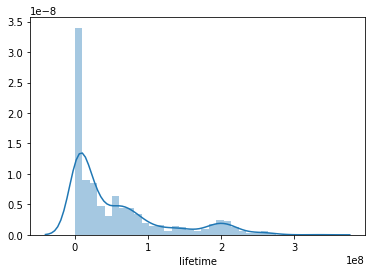

In [6]:
plot_and_print_skew(df, 'lifetime')

Skewness: 16.263015
Kurtosis: 305.300181


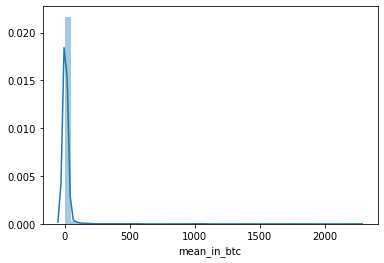

In [7]:
plot_and_print_skew(df, 'mean_in_btc')

Skewness: 15.165498
Kurtosis: 283.418518


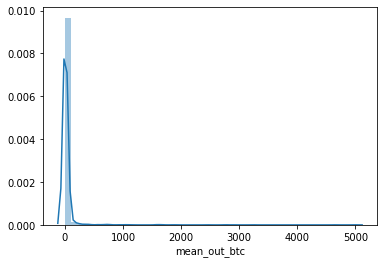

In [8]:
plot_and_print_skew(df, 'mean_out_btc')

Skewness: 16.854554
Kurtosis: 379.176600


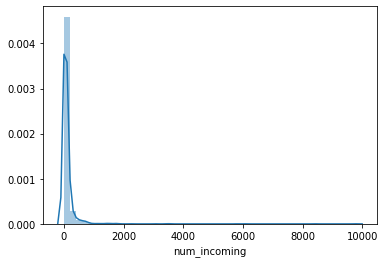

In [9]:
plot_and_print_skew(df, 'num_incoming')

Skewness: 19.658451
Kurtosis: 467.303708


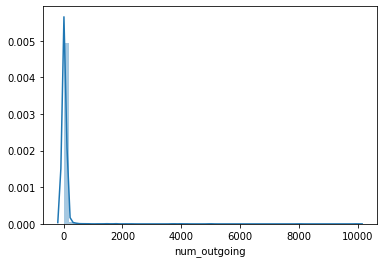

In [10]:
plot_and_print_skew(df, 'num_outgoing')

Skewness: 51.125548
Kurtosis: 2709.758379


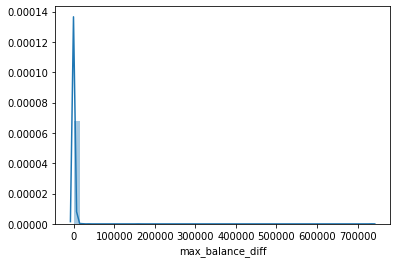

In [11]:
plot_and_print_skew(df, 'max_balance_diff')

In [12]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

In [13]:
features = ['lifetime',
            'active_days',
            'max_daily_trans',
            'gini_in_btc',
            'mean_in_btc',
            'std_in_btc',
            'gini_out_btc',
            'mean_out_btc',
            'std_out_btc',
            'total_in_btc',
            'total_out_btc',
            'num_incoming',
            'num_outgoing',
            'in_out_ratio',
            'uniq_in_addresses',
            'uniq_out_addresses',
            'uniq_addresses',
            'min_delay',
            'max_delay',
            'mean_delay',
            'median_delay',
            'max_balance_diff']

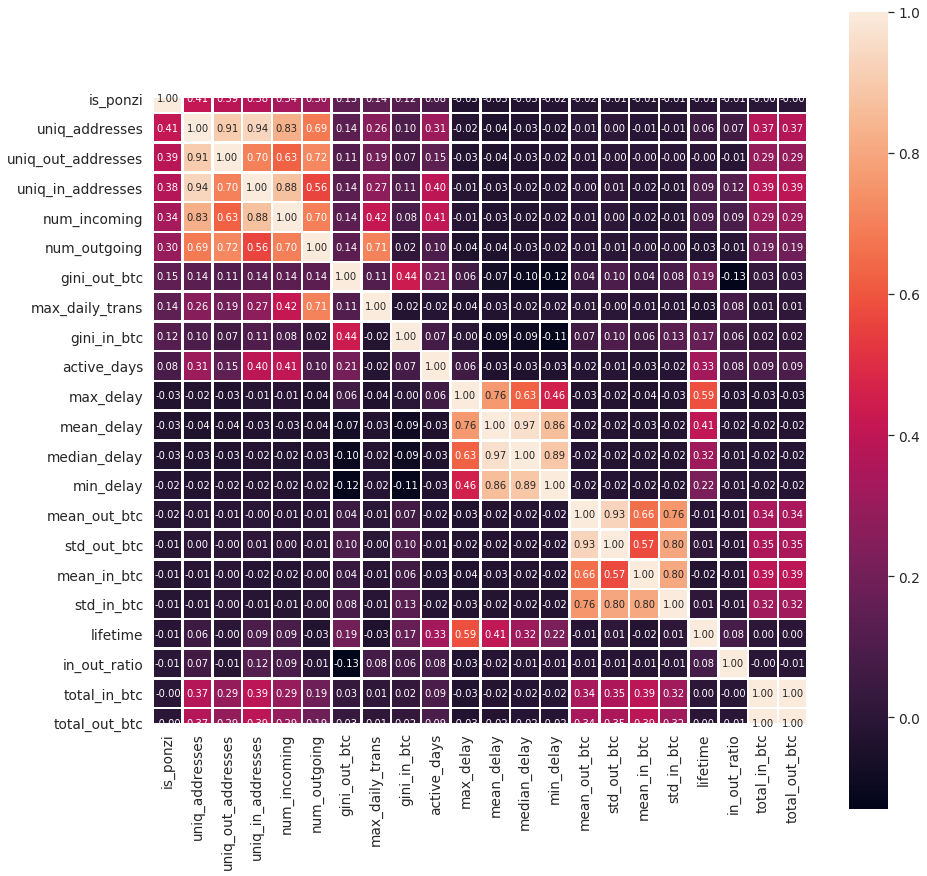

In [14]:
plot_corr_matrix(df, len(features), 'is_ponzi')

In [15]:
df.dtypes

address                object
is_ponzi                int64
lifetime              float64
active_days           float64
max_daily_trans       float64
gini_in_btc           float64
mean_in_btc           float64
std_in_btc            float64
gini_out_btc          float64
mean_out_btc          float64
std_out_btc           float64
total_in_btc          float64
total_out_btc         float64
num_incoming          float64
num_outgoing          float64
in_out_ratio          float64
uniq_in_addresses     float64
uniq_out_addresses    float64
uniq_addresses        float64
min_delay             float64
max_delay             float64
mean_delay            float64
median_delay          float64
max_balance_diff      float64
dtype: object

In [16]:
from scipy.stats import skew
features_df = df[features]
skewed_features = features_df[features_df.dtypes.index].apply(lambda x: skew(x.dropna())).sort_values(ascending=False) 
skewed_df = pd.DataFrame({'Skew' :skewed_features})

features_df[skewed_df.index] = np.log1p(features_df[skewed_df.index])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


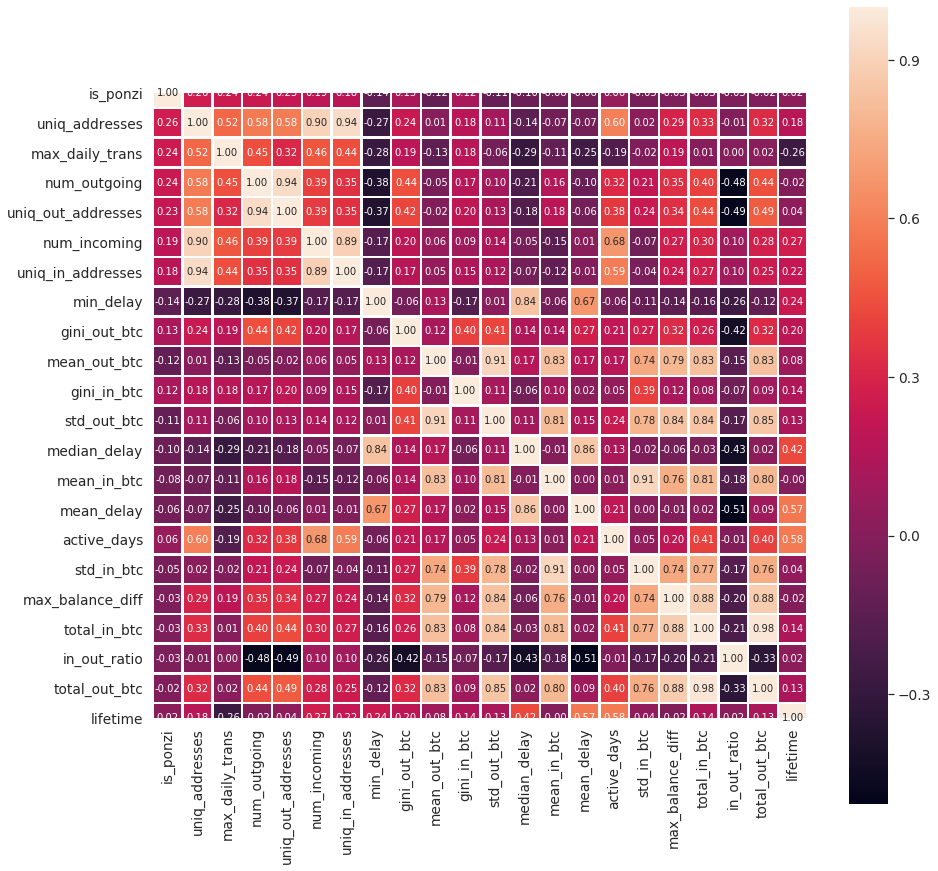

In [17]:
features_df['is_ponzi'] = df['is_ponzi'].values
plot_corr_matrix(features_df, len(features), 'is_ponzi')

In [18]:
# we can see here that after the transform 25%, 50% to max is not drastic anymore
features_df.describe()

lifetime  active_days  max_daily_trans   gini_in_btc  mean_in_btc  \
count  3019.000000  3019.000000      3019.000000  3.019000e+03  3019.000000   
mean     16.877715     3.613994         1.969713  3.352615e-01     0.959190   
std       1.724575     0.889701         0.876723  1.616340e-01     1.056913   
min       1.098612     0.693147         0.693147 -2.775530e-17     0.000216   
25%      15.643457     3.135494         1.386294  2.211498e-01     0.227936   
50%      17.138165     3.526361         1.791759  3.361483e-01     0.688470   
75%      18.194099     4.077537         2.302585  4.513345e-01     1.256574   
max      19.631432     7.147559         8.484670  6.905885e-01     7.713054   

        std_in_btc  gini_out_btc  mean_out_btc  std_out_btc  total_in_btc  \
count  3019.000000   3019.000000   3019.000000  3019.000000   3019.000000   
mean      0.938867      0.381682      1.719775     1.699700      3.886467   
std       1.159016      0.149556      1.349953     1.435858      1.893011   
min       0.000000      0.000000      0.000000     0.000000      0.009950   
25%       0.175162      0.306401      0.715958     0.581593      2.689108   
50%       0.511822      0.396370      1.497388     1.426434      3.848870   
75%       1.268768      0.485302      2.427378     2.490402      5.000686   
max       8.317070      0.692980      8.515973     9.005966     12.662547   

       ...  in_out_ratio  uniq_in_addresses  uniq_out_addresses  \
count  ...   3019.000000        3019.000000         3019.000000   
mean   ...      2.255867           3.794138            2.595101   
std    ...      3.861814           0.962065            1.078453   
min    ...      0.000200           0.693147            0.000000   
25%    ...      0.929536           3.178054            1.945910   
50%    ...      1.512446           3.610918            2.564949   
75%    ...      2.258574           4.290459            3.178054   
max    ...     30.481728           9.000483            9.074062   

       uniq_addresses    min_delay    max_delay   mean_delay  median_delay  \
count     3019.000000  3019.000000  3019.000000  3019.000000   3019.000000   
mean         4.150172     8.271164    13.912383    12.439370     10.911230   
std          0.879318     3.417938     3.301239     3.159188      3.101178   
min          1.386294     0.000000     0.000000     0.000000      0.000000   
25%          3.526361     6.311733    12.110703    10.651859      9.389427   
50%          3.931826     7.765993    14.078518    12.380302     10.579196   
75%          4.590044     9.727347    16.333572    14.518839     12.211905   
max          9.732106    19.152065    19.158032    19.152065     19.152065   

       max_balance_diff     is_ponzi  
count       3019.000000  3019.000000  
mean           2.728626     0.010268  
std            1.806103     0.100828  
min            0.000000     0.000000  
25%            1.432701     0.000000  
50%            2.450143     0.000000  
75%            3.734808     0.000000  
max           13.506531     1.000000  

[8 rows x 23 columns]

Skewness: 1.184155
Kurtosis: 2.039213


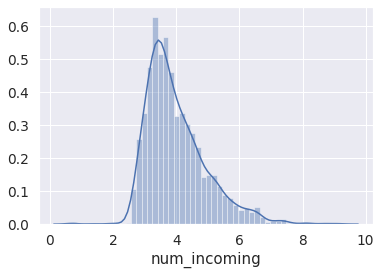

In [19]:
plot_and_print_skew(features_df, 'num_incoming')

Skewness: 0.735560
Kurtosis: 3.189071


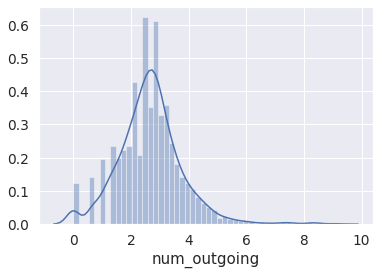

In [20]:
plot_and_print_skew(features_df, 'num_outgoing')

Skewness: 0.951839
Kurtosis: 1.445197


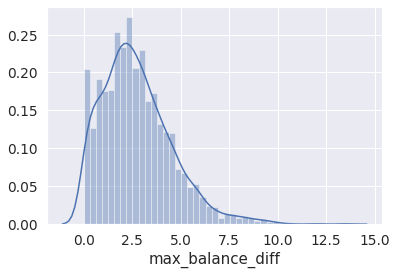

In [21]:
plot_and_print_skew(features_df, 'max_balance_diff')

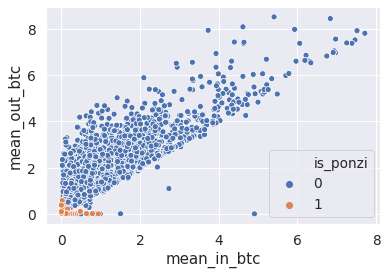

In [22]:
sns.scatterplot(x="mean_in_btc", y="mean_out_btc", data=features_df, hue='is_ponzi')

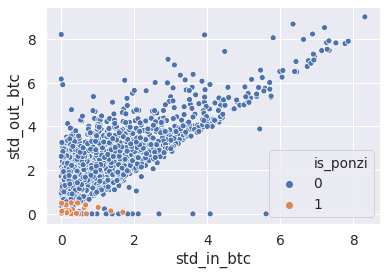

In [23]:
sns.scatterplot(x="std_in_btc", y="std_out_btc", data=features_df, hue='is_ponzi')

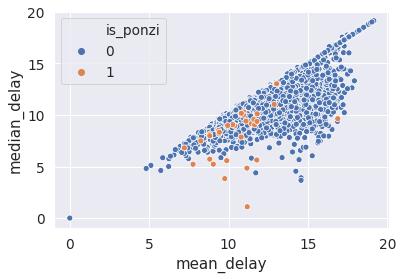

In [24]:
sns.scatterplot(x="mean_delay", y="median_delay", data=features_df, hue='is_ponzi')

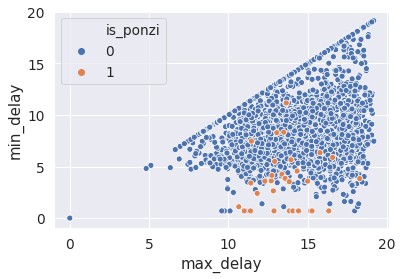

In [25]:
sns.scatterplot(x="max_delay", y="min_delay", data=features_df, hue='is_ponzi')

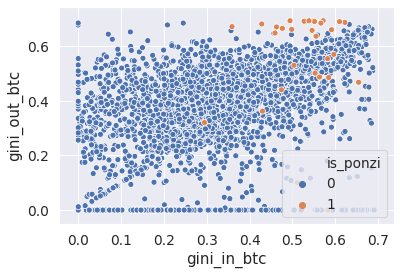

In [26]:
sns.scatterplot(x="gini_in_btc", y="gini_out_btc", data=features_df, hue='is_ponzi')

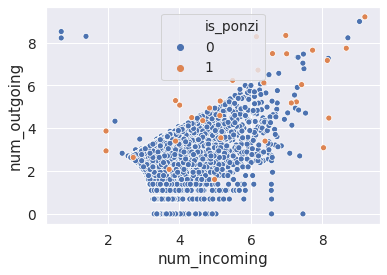

In [27]:
sns.scatterplot(x="num_incoming", y="num_outgoing", data=features_df, hue='is_ponzi')

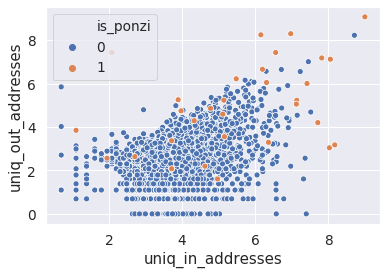

In [28]:
sns.scatterplot(x="uniq_in_addresses", y="uniq_out_addresses", data=features_df, hue='is_ponzi')

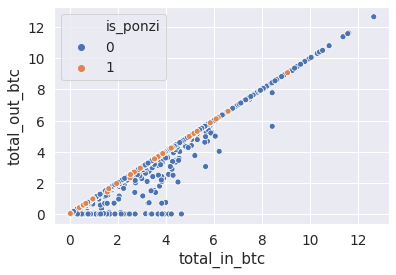

In [29]:
sns.scatterplot(x="total_in_btc", y="total_out_btc", data=features_df, hue='is_ponzi')

In [30]:
# features_df['mean_in_plus_mean_out_btc'] = features_df['mean_in_btc'] + features_df['mean_out_btc']
# features_df['std_in_plus_std_out_btc'] = features_df['std_in_btc'] + features_df['std_out_btc']

In [31]:
ponzhi_df = features_df[features_df['is_ponzi'] == 1]
non_ponzhi_df = features_df[features_df['is_ponzi'] == 0]

In [32]:
# sns.distplot(ponzhi_df['mean_in_plus_mean_out_btc'], hist=True, rug=True)
# sns.distplot(non_ponzhi_df['mean_in_plus_mean_out_btc'], hist=True, rug=True)

In [33]:
# sns.distplot(ponzhi_df['std_in_plus_std_out_btc'], hist=True, rug=True)
# sns.distplot(non_ponzhi_df['std_in_plus_std_out_btc'], hist=True, rug=True)

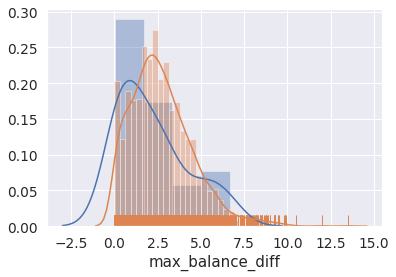

In [34]:
sns.distplot(ponzhi_df['max_balance_diff'], hist=True, rug=True)
sns.distplot(non_ponzhi_df['max_balance_diff'], hist=True, rug=True)

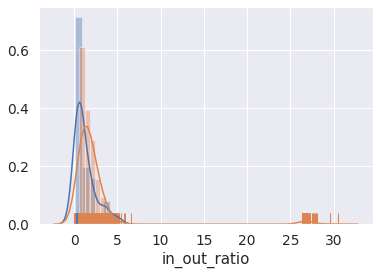

In [35]:
sns.distplot(ponzhi_df['in_out_ratio'], hist=True, rug=True)
sns.distplot(non_ponzhi_df['in_out_ratio'], hist=True, rug=True)

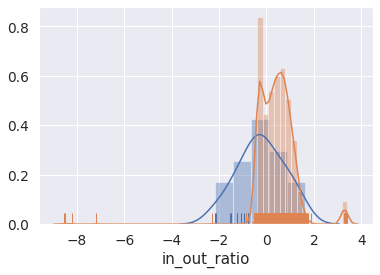

In [36]:
sns.distplot(np.log(ponzhi_df['in_out_ratio']), hist=True, rug=True)
sns.distplot(np.log(non_ponzhi_df['in_out_ratio']), hist=True, rug=True)

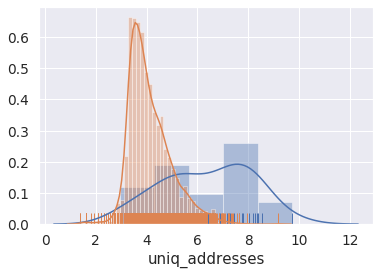

In [37]:
sns.distplot(ponzhi_df['uniq_addresses'], hist=True, rug=True)
sns.distplot(non_ponzhi_df['uniq_addresses'], hist=True, rug=True)

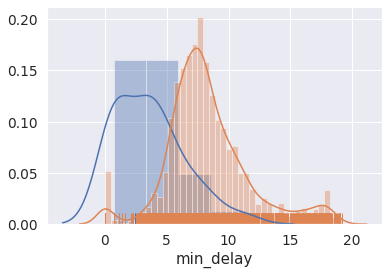

In [38]:
sns.distplot(ponzhi_df['min_delay'], hist=True, rug=True)
sns.distplot(non_ponzhi_df['min_delay'], hist=True, rug=True)

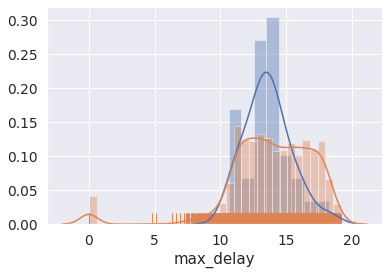

In [39]:
sns.distplot(ponzhi_df['max_delay'], hist=True, rug=True)
sns.distplot(non_ponzhi_df['max_delay'], hist=True, rug=True)

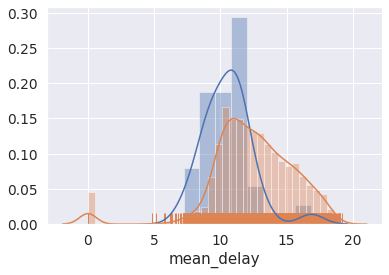

In [40]:
sns.distplot(ponzhi_df['mean_delay'], hist=True, rug=True)
sns.distplot(non_ponzhi_df['mean_delay'], hist=True, rug=True)

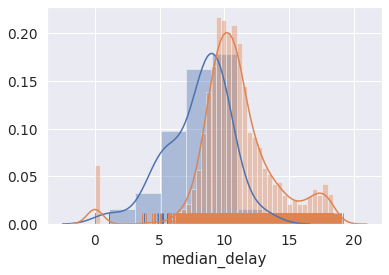

In [41]:
sns.distplot(ponzhi_df['median_delay'], hist=True, rug=True)
sns.distplot(non_ponzhi_df['median_delay'], hist=True, rug=True)

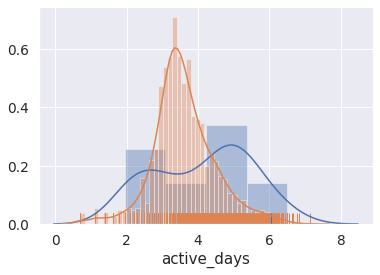

In [42]:
sns.distplot(ponzhi_df['active_days'], hist=True, rug=True)
sns.distplot(non_ponzhi_df['active_days'], hist=True, rug=True)

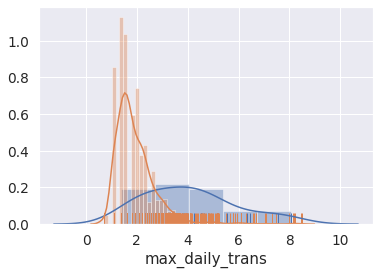

In [43]:
sns.distplot(ponzhi_df['max_daily_trans'], hist=True, rug=True)
sns.distplot(non_ponzhi_df['max_daily_trans'], hist=True, rug=True)

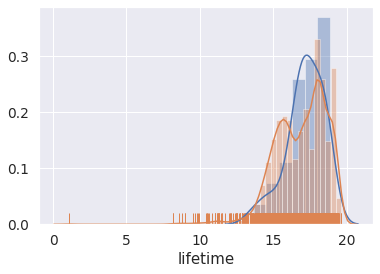

In [44]:
sns.distplot(ponzhi_df['lifetime'], hist=True, rug=True)
sns.distplot(non_ponzhi_df['lifetime'], hist=True, rug=True)

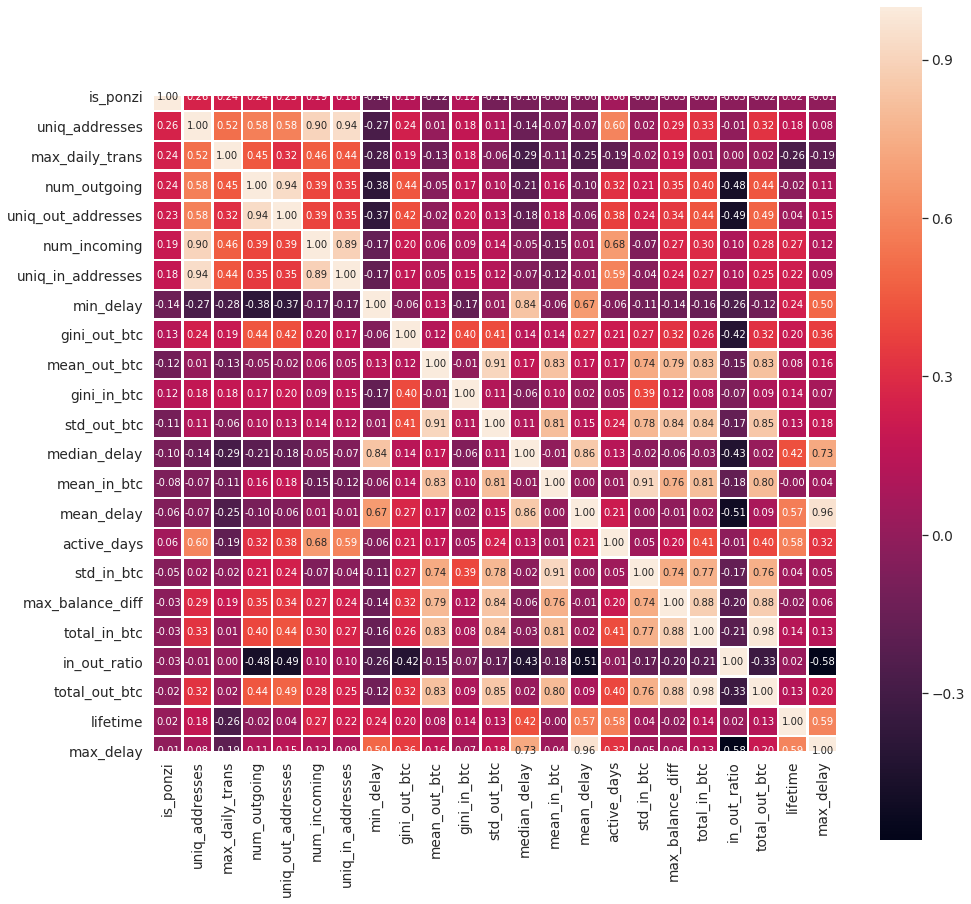

In [45]:
plot_corr_matrix(features_df, features_df.shape[1], 'is_ponzi')

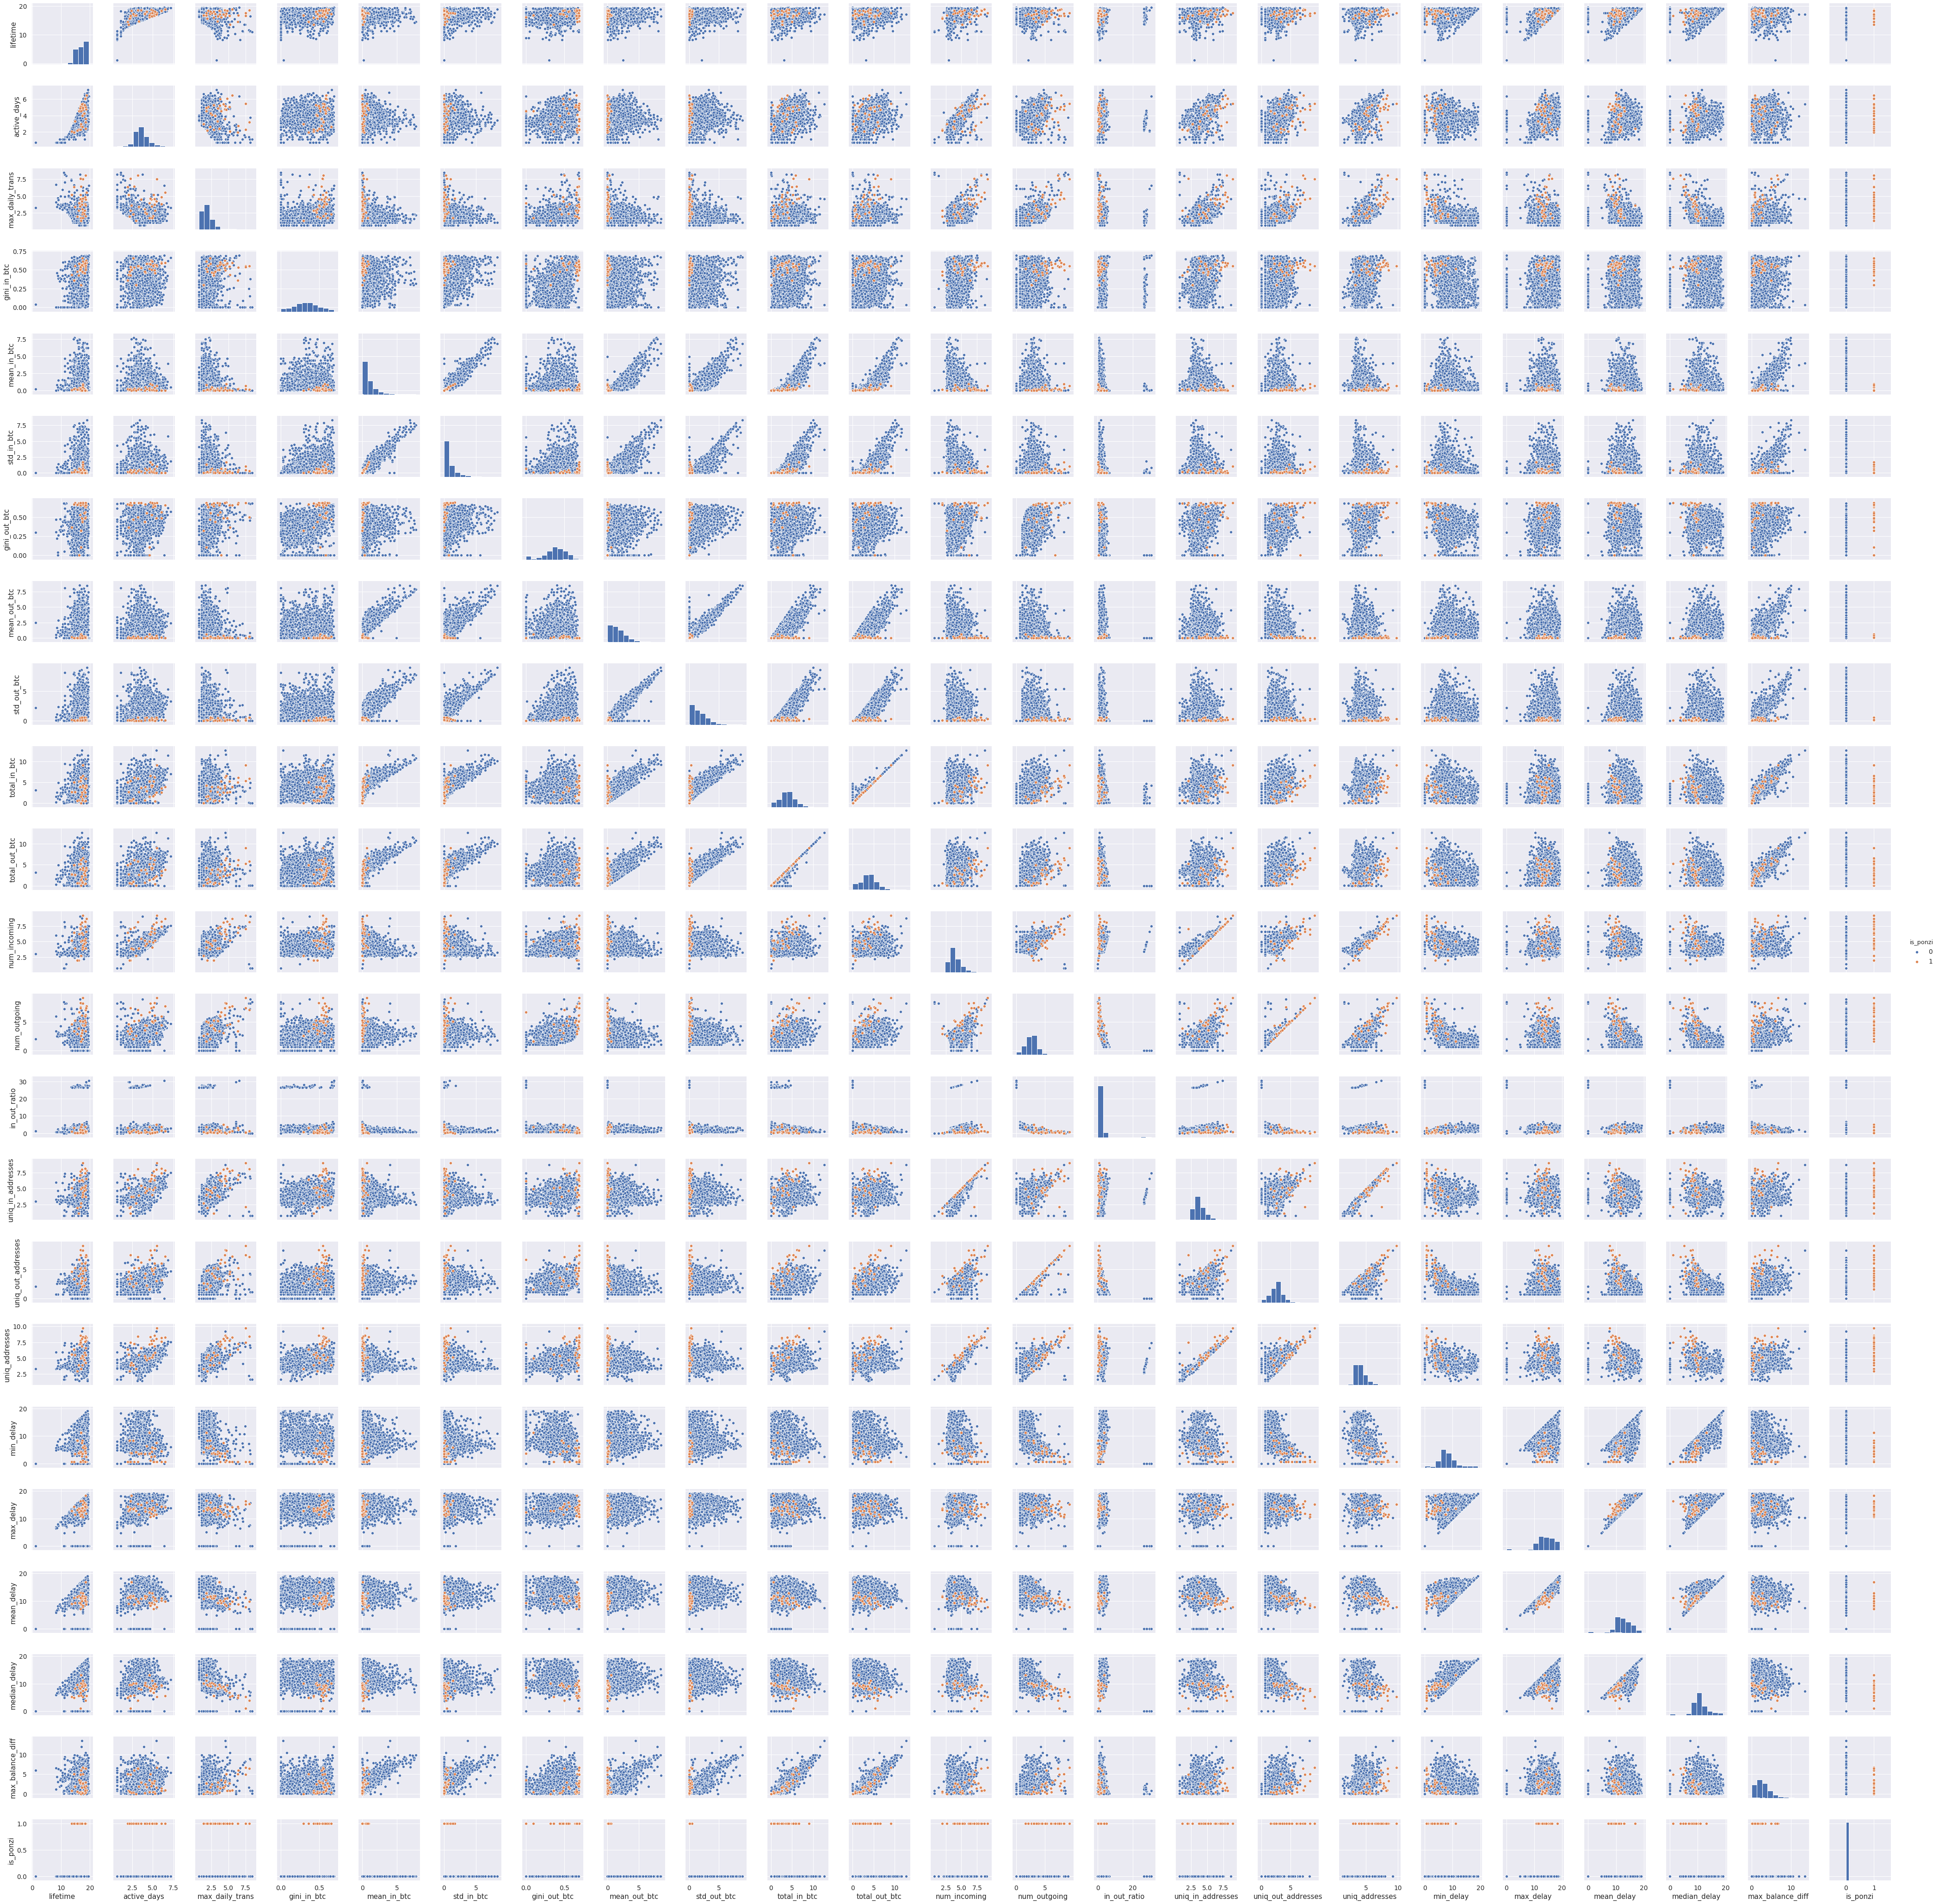

In [47]:
sns.pairplot(data=features_df, hue = 'is_ponzi', diag_kind='hist')

In [48]:
len(features)

22

0    2988
1      31
Name: is_ponzi, dtype: int64

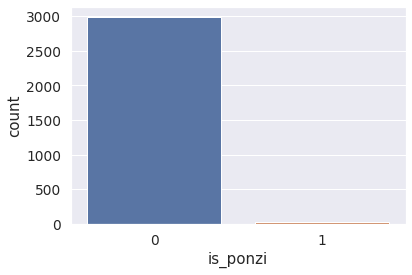

In [49]:
# nr_rows = 22
# nr_cols = 3

# fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

# li_num_feats = list(numerical_feats)
# li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
# li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


# for r in range(0,nr_rows):
#     for c in range(0,nr_cols):  
#         i = r*nr_cols+c
#         if i < len(li_plot_num_feats):
#             sns.regplot(df_train[li_plot_num_feats[i]], df_train[target], ax = axs[r][c])
#             stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
#             #axs[r][c].text(0.4,0.9,"title",fontsize=7)
#             str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
#             axs[r][c].set_title(str_title,fontsize=11)
            
# plt.tight_layout()    
# plt.show()
sns.countplot("is_ponzi", data = features_df)
features_df['is_ponzi'].value_counts()

In [ ]:
!ls

In [50]:
features_df.to_csv('data/transformed_features.csv', index=False)